In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

from os import listdir
from os.path import isfile, join

In [17]:
size = 512
R = 1000000

T = 2**7

In [18]:
labels = [
        r'TAP',
        r'MS',
        r'CMS',
       ]

cmap = cm.get_cmap('plasma_r')
colors = []
for i in range(4):
    colors += [cmap((i) / 3)]

line = [(5, 4), (5, 4), '', (5, 4)]


In [19]:
filename = 'data/forward/forward_100_R_' + str(R) + '.npz'
data = np.load(filename)

In [30]:
base_path = 'data/forward/'
files = [f for f in listdir(base_path) if isfile(join(base_path, f))]

files = sorted(files, key = lambda x: int(x.split('_')[1]))
betas_s = [float(f.split('_')[1])/100 for f in files]

In [21]:
mP_CMS_mean = np.zeros(len(files))
mP_TAP_mean = np.zeros(len(files))
m_MS_mean = np.zeros(len(files))
m_gt_mean = np.zeros(len(files))


CP_CMS_mean = np.zeros(len(files))
CP_TAP_mean = np.zeros(len(files))
C_MS_mean = np.zeros(len(files))
C_gt_mean = np.zeros(len(files))

DP_CMS_mean = np.zeros(len(files))
DP_TAP_mean = np.zeros(len(files))
D_MS_mean = np.zeros(len(files))
D_gt_mean = np.zeros(len(files))


for i, f in enumerate(files):
    data = np.load(join(base_path, f))
    mP_TAP_mean[i] = np.mean(data['mP_t1_t_mean'])
    m_MS_mean[i] = np.mean(data['mP_t1_mean'])
    mP_CMS_mean[i] = np.mean(data['mP_CMS_mean'])
    m_gt_mean[i] = np.mean(data['mPexp_mean'])  
    
    CP_TAP_mean[i] = np.mean(data['CP_t1_t_mean'])
    C_MS_mean[i] = np.mean(data['CP_t1_mean'])
    CP_CMS_mean[i] = np.mean(data['CP_CMS_mean'])
    C_gt_mean[i] = np.mean(data['CPexp_mean'])  
    
    DP_TAP_mean[i] = np.mean(data['DP_t1_t_mean'])
    D_MS_mean[i] = np.mean(data['DP_t1_mean'])
    DP_CMS_mean[i] = np.mean(data['DP_CMS_mean'])
    D_gt_mean[i] = np.mean(data['DPexp_mean'])  

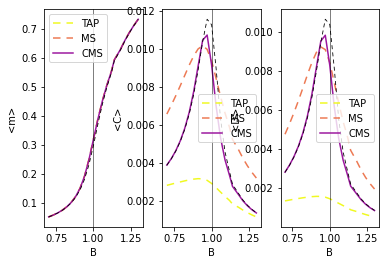

In [84]:
fig, ax = plt.subplots(1, 3)

ax[0].plot(betas, mP_TAP_mean, dashes=line[0],
               color=colors[0], label=labels[0])
ax[0].plot(betas, m_MS_mean, dashes=line[1],
           color=colors[1], label=labels[1])
ax[0].plot(betas, mP_CMS_mean, dashes=line[2],
           color=colors[2], label=labels[2])
ax[0].plot(betas, m_gt_mean,'k', dashes=line[3], lw=0.8)  # , label=r'$P$')
ax[0].set_xlabel('B')
ax[0].set_ylabel('<m>')
ax[0].axvline(x=1.0, color='k', lw=0.5)
ax[0].legend()


ax[1].plot(betas, CP_TAP_mean, dashes=line[0],
               color=colors[0], label=labels[0])
ax[1].plot(betas, C_MS_mean, dashes=line[1],
           color=colors[1], label=labels[1])
ax[1].plot(betas, CP_CMS_mean, dashes=line[2],
           color=colors[2], label=labels[2])
ax[1].plot(betas, C_gt_mean,'k', dashes=line[3], lw=0.8)  # , label=r'$P$')
ax[1].set_xlabel('B')
ax[1].set_ylabel('<C>')
ax[1].axvline(x=1.0, color='k', lw=0.5)
ax[1].legend()

ax[2].plot(betas, DP_TAP_mean, dashes=line[0],
               color=colors[0], label=labels[0])
ax[2].plot(betas, D_MS_mean, dashes=line[1],
           color=colors[1], label=labels[1])
ax[2].plot(betas, DP_CMS_mean, dashes=line[2],
           color=colors[2], label=labels[2])
ax[2].plot(betas, D_gt_mean,'k', dashes=line[3], lw=0.8)  # , label=r'$P$')
ax[2].set_xlabel('B')
ax[2].set_ylabel('<D>')
ax[2].axvline(x=1.0, color='k', lw=0.5)
ax[2].legend()

In [22]:
base_path = 'data/reconstruction/'
files = [f for f in listdir(base_path) if isfile(join(base_path, f))]
files = [f for f in files if '_r_' in f]

files = sorted(files, key = lambda x: int(x.split('_')[2]))
betas = [float(f.split('_')[2])/100 for f in files]
betas
B = 201
betas = 1 + np.linspace(-1, 1, B) * 0.3
betas

array([0.7  , 0.703, 0.706, 0.709, 0.712, 0.715, 0.718, 0.721, 0.724,
       0.727, 0.73 , 0.733, 0.736, 0.739, 0.742, 0.745, 0.748, 0.751,
       0.754, 0.757, 0.76 , 0.763, 0.766, 0.769, 0.772, 0.775, 0.778,
       0.781, 0.784, 0.787, 0.79 , 0.793, 0.796, 0.799, 0.802, 0.805,
       0.808, 0.811, 0.814, 0.817, 0.82 , 0.823, 0.826, 0.829, 0.832,
       0.835, 0.838, 0.841, 0.844, 0.847, 0.85 , 0.853, 0.856, 0.859,
       0.862, 0.865, 0.868, 0.871, 0.874, 0.877, 0.88 , 0.883, 0.886,
       0.889, 0.892, 0.895, 0.898, 0.901, 0.904, 0.907, 0.91 , 0.913,
       0.916, 0.919, 0.922, 0.925, 0.928, 0.931, 0.934, 0.937, 0.94 ,
       0.943, 0.946, 0.949, 0.952, 0.955, 0.958, 0.961, 0.964, 0.967,
       0.97 , 0.973, 0.976, 0.979, 0.982, 0.985, 0.988, 0.991, 0.994,
       0.997, 1.   , 1.003, 1.006, 1.009, 1.012, 1.015, 1.018, 1.021,
       1.024, 1.027, 1.03 , 1.033, 1.036, 1.039, 1.042, 1.045, 1.048,
       1.051, 1.054, 1.057, 1.06 , 1.063, 1.066, 1.069, 1.072, 1.075,
       1.078, 1.081,

In [23]:
mP_CMS_r_mean = np.zeros(len(files))
mP_TAP_r_mean = np.zeros(len(files))
m_MS_r_mean = np.zeros(len(files))


CP_CMS_r_mean = np.zeros(len(files))
CP_TAP_r_mean = np.zeros(len(files))
C_MS_r_mean = np.zeros(len(files))

DP_CMS_r_mean = np.zeros(len(files))
DP_TAP_r_mean = np.zeros(len(files))
D_MS_r_mean = np.zeros(len(files))


for i, f in enumerate(files):
    data = np.load(join(base_path, f))
    mP_TAP_r_mean[i] = np.mean(data['mP_t1_t_mean'])
    m_MS_r_mean[i] = np.mean(data['mP_t1_mean'])
    mP_CMS_r_mean[i] = np.mean(data['mP_CMS_mean'])
#     m_gt_mean[i] = np.mean(data['mPexp_mean'])  
    
    CP_TAP_r_mean[i] = np.mean(data['CP_t1_t_mean'])
    C_MS_r_mean[i] = np.mean(data['CP_t1_mean'])
    CP_CMS_r_mean[i] = np.mean(data['CP_CMS_mean'])
#     C_gt_r_mean[i] = np.mean(data['CPexp_mean'])  
    
    DP_TAP_r_mean[i] = np.mean(data['DP_t1_t_mean'])
    D_MS_r_mean[i] = np.mean(data['DP_t1_mean'])
    DP_CMS_r_mean[i] = np.mean(data['DP_CMS_mean'])
#     D_gt_r_mean[i] = np.mean(data['DPexp_mean'])  

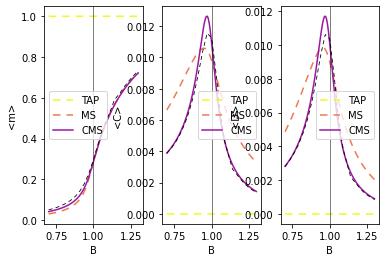

In [31]:
fig, ax = plt.subplots(1, 3)

ax[0].plot(betas, mP_TAP_r_mean, dashes=line[0],
               color=colors[0], label=labels[0])
ax[0].plot(betas, m_MS_r_mean, dashes=line[1],
           color=colors[1], label=labels[1])
ax[0].plot(betas, mP_CMS_r_mean, dashes=line[2],
           color=colors[2], label=labels[2])
ax[0].plot(betas_s, m_gt_mean,'k', dashes=line[3], lw=0.8)  # , label=r'$P$')
ax[0].set_xlabel('B')
ax[0].set_ylabel('<m>')
ax[0].axvline(x=1.0, color='k', lw=0.5)
ax[0].legend()


ax[1].plot(betas, CP_TAP_r_mean, dashes=line[0],
               color=colors[0], label=labels[0])
ax[1].plot(betas, C_MS_r_mean, dashes=line[1],
           color=colors[1], label=labels[1])
ax[1].plot(betas, CP_CMS_r_mean, dashes=line[2],
           color=colors[2], label=labels[2])
ax[1].plot(betas_s, C_gt_mean,'k', dashes=line[3], lw=0.8)  # , label=r'$P$')
ax[1].set_xlabel('B')
ax[1].set_ylabel('<C>')
ax[1].axvline(x=1.0, color='k', lw=0.5)
ax[1].legend()

ax[2].plot(betas, DP_TAP_r_mean, dashes=line[0],
               color=colors[0], label=labels[0])
ax[2].plot(betas, D_MS_r_mean, dashes=line[1],
           color=colors[1], label=labels[1])
ax[2].plot(betas, DP_CMS_r_mean, dashes=line[2],
           color=colors[2], label=labels[2])
ax[2].plot(betas_s, D_gt_mean,'k', dashes=line[3], lw=0.8)  # , label=r'$P$')
ax[2].set_xlabel('B')
ax[2].set_ylabel('<D>')
ax[2].axvline(x=1.0, color='k', lw=0.5)
ax[2].legend()

In [28]:
len(mP_TAP_mean)

21